# 第七章　給湯設備 / Chapter 7 Hot water supply system

## 第一節　給湯設備 / Section 1 Hot water supply system

In [60]:
import numpy as np
import matplotlib.pyplot as plt

from pyhees.section2_1_c import get_n_p
from pyhees.section2_1_b import get_f_prim
from pyhees.section7_1 import calc_E_E_W_d_t, calc_E_G_W_d_t, calc_E_K_W_d_t


# 試算例

In [61]:
def get_default_hot_water_demand():

  base = {'region' : 6, 'sol_region' : None, 'A_A' : 120, 'L_HWH' : None, 'heating_flag_d' : None}

  HW = {'hw_type' : 'ガス潜熱回収型給湯機', 'e_rtd' : 0.836, 'e_dash_rtd' : None, 'hybrid_category' : None,
        'bath_function' : 'ふろ給湯機(追焚あり)', 'has_bath' : True, 'pipe_diameter' : '上記以外',
        'kitchen_watersaving_A' : False, 'kitchen_watersaving_C' : False,  'shower_watersaving_A' : False,
        'shower_watersaving_B' : False, 'washbowl_watersaving_C' : False, 'bath_insulation' : False}

  return base, HW

In [62]:
def calc_results(base, HW):

    L_HWH = base['L_HWH']
    region = base['region']
    sol_region = base['sol_region']
    heating_flag_d = base['heating_flag_d']
    A_A = base['A_A']
    n_p = get_n_p(A_A)
    SHC = None

    temp_E = calc_E_E_W_d_t(n_p, L_HWH, heating_flag_d, region, sol_region, HW, SHC)
    temp_G = calc_E_G_W_d_t(n_p, L_HWH, heating_flag_d, A_A, region, sol_region, HW, SHC)
    temp_K = calc_E_K_W_d_t(n_p, L_HWH, heating_flag_d, A_A, region, sol_region, HW, SHC)
    
    f_prim = get_f_prim()
    Ene_TOTAL = temp_E * f_prim / 1000 + temp_G + temp_K

    print('給湯用一次エネルギー消費量 = {}MJ/年'.format(np.sum(Ene_TOTAL)))

    return {'Ene_TOTAL': Ene_TOTAL}


In [63]:
def get_each_graph(_results):

    results_sum_day = np.sum(_results.reshape(365,24), axis = 1)
    results_mean_hour = np.mean(_results.reshape(365,24), axis = 0)

    fig = plt.figure(figsize = (20,12))
    grh1 = fig.add_subplot(311)
    grh1.set_ylabel('MJ/h')
    grh1.set_xlabel('hour')
    grh1.plot(_results)

    grh_day = fig.add_subplot(312)
    grh_day.set_ylabel('MJ/d')
    grh_day.set_xlabel('day')
    grh_day.plot(results_sum_day)

    grh_hour = fig.add_subplot(313)
    grh_hour.plot(results_mean_hour)
    grh_hour.set_ylabel('MJ/h')
    grh_hour.set_xlabel('hour')

    plt.show()


### 計算条件1

初期条件での計算

In [64]:
base, HW = get_default_hot_water_demand()

testcase1 = calc_results(base, HW)['Ene_TOTAL']


E_E_hs_aux1 = 37.22433263888889
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 13.686551818865741
給湯用一次エネルギー消費量 = 23685.97691330349MJ/年


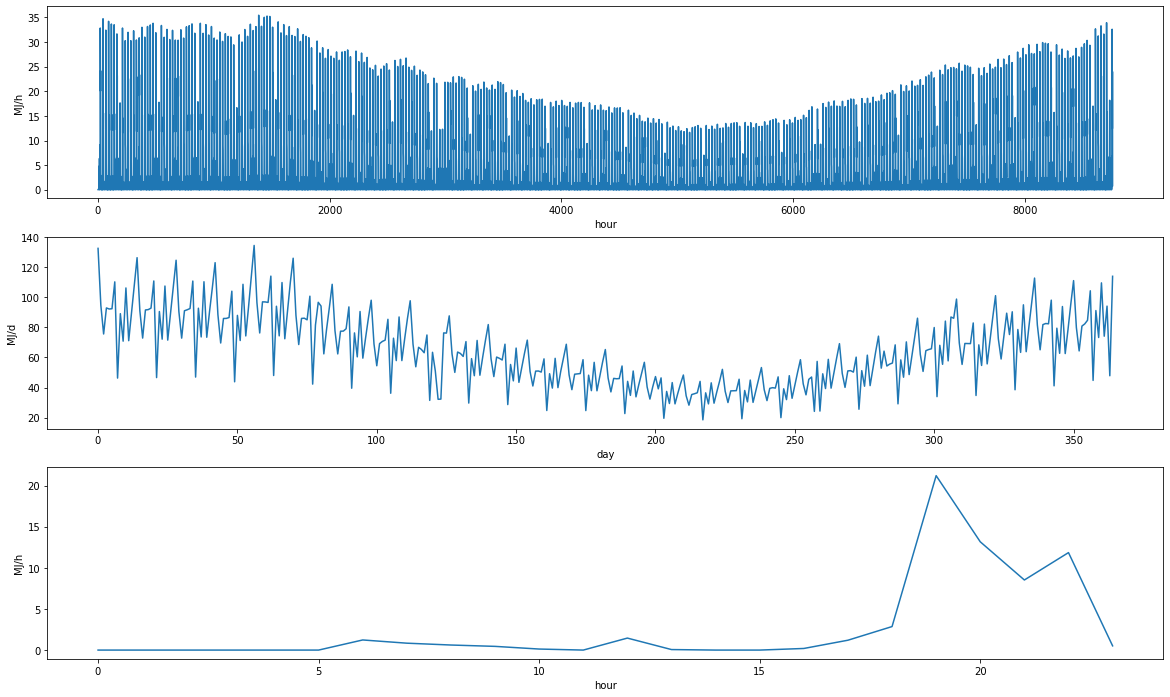

In [65]:
get_each_graph(testcase1)

### 計算条件2

- 石油潜熱回収型給湯機（効率81.9%）に変更

In [66]:
base, HW = get_default_hot_water_demand()

HW['hw_type'] = '石油潜熱回収型給湯機'
HW['e_rtd'] = 0.819

testcase2 = calc_results(base, HW)['Ene_TOTAL']

給湯用一次エネルギー消費量 = 23632.18030727068MJ/年


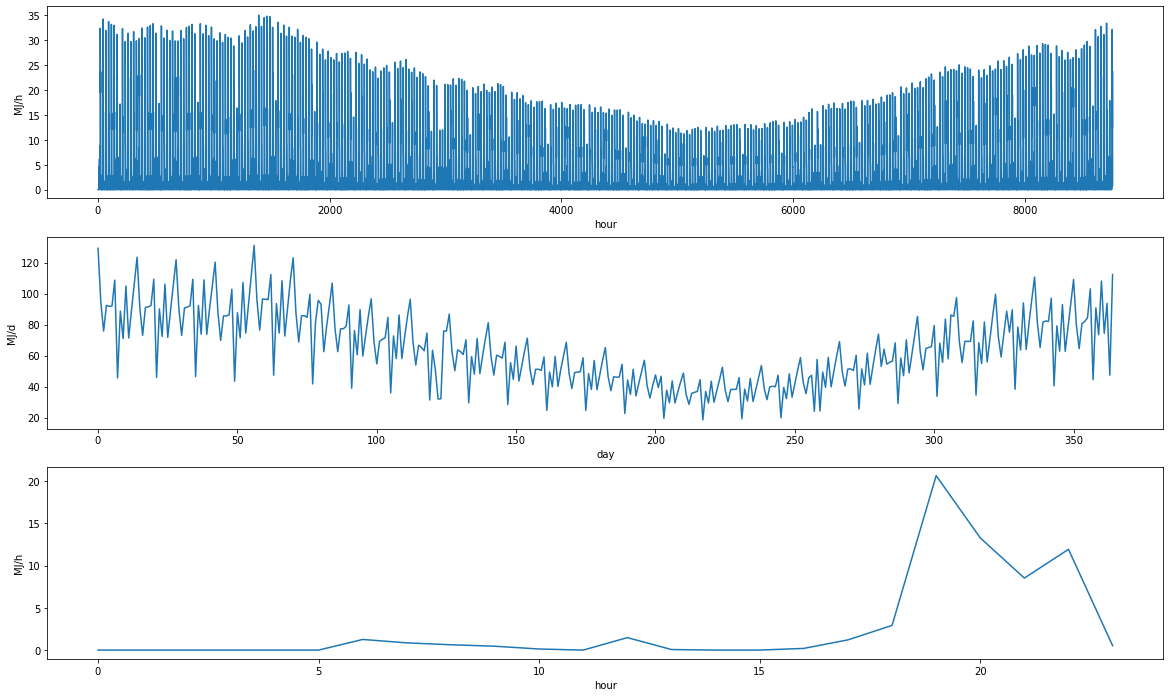

In [67]:
get_each_graph(testcase2)

### 計算条件3

- 電気ヒーター給湯機に変更

In [68]:
base, HW = get_default_hot_water_demand()

HW['hw_type'] = '電気ヒーター給湯機'

testcase3 = calc_results(base, HW)['Ene_TOTAL']

給湯用一次エネルギー消費量 = 59851.374867760234MJ/年


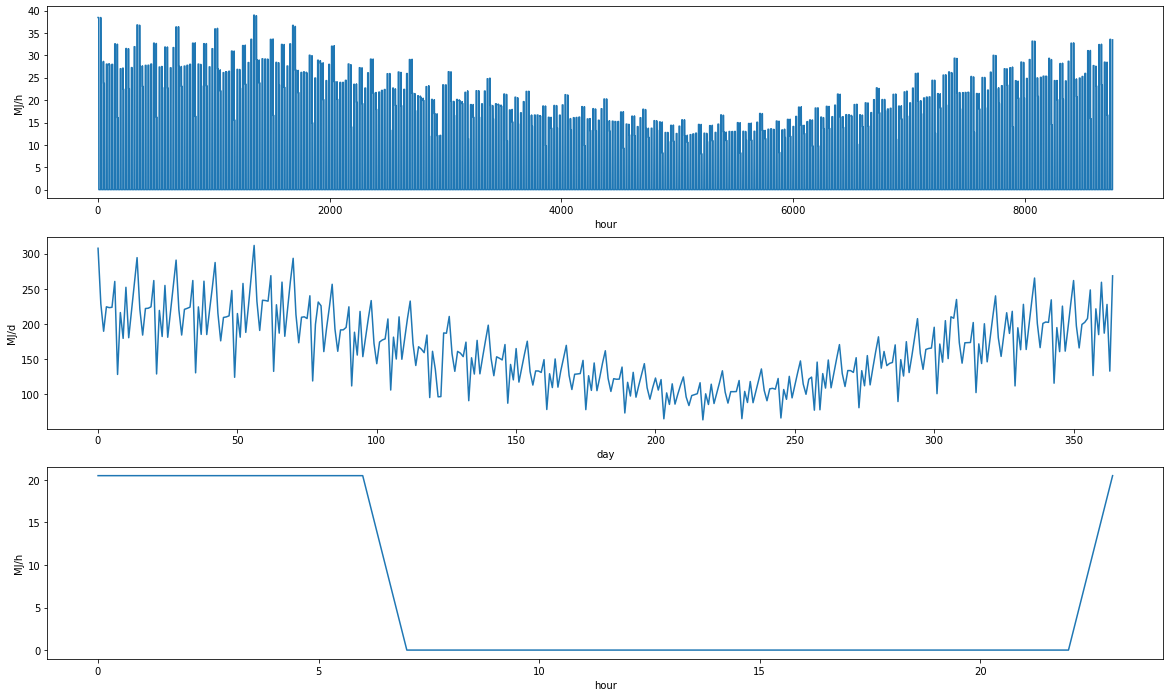

In [69]:
get_each_graph(testcase3)

### 計算条件4

- 電気ヒートポンプ給湯機（JIS効率3.6）に変更

In [70]:
base, HW = get_default_hot_water_demand()

HW['hw_type'] = '電気ヒートポンプ給湯機'
HW['e_rtd'] = 3.6

testcase4 = calc_results(base, HW)['Ene_TOTAL']


給湯用一次エネルギー消費量 = 16477.45879407125MJ/年


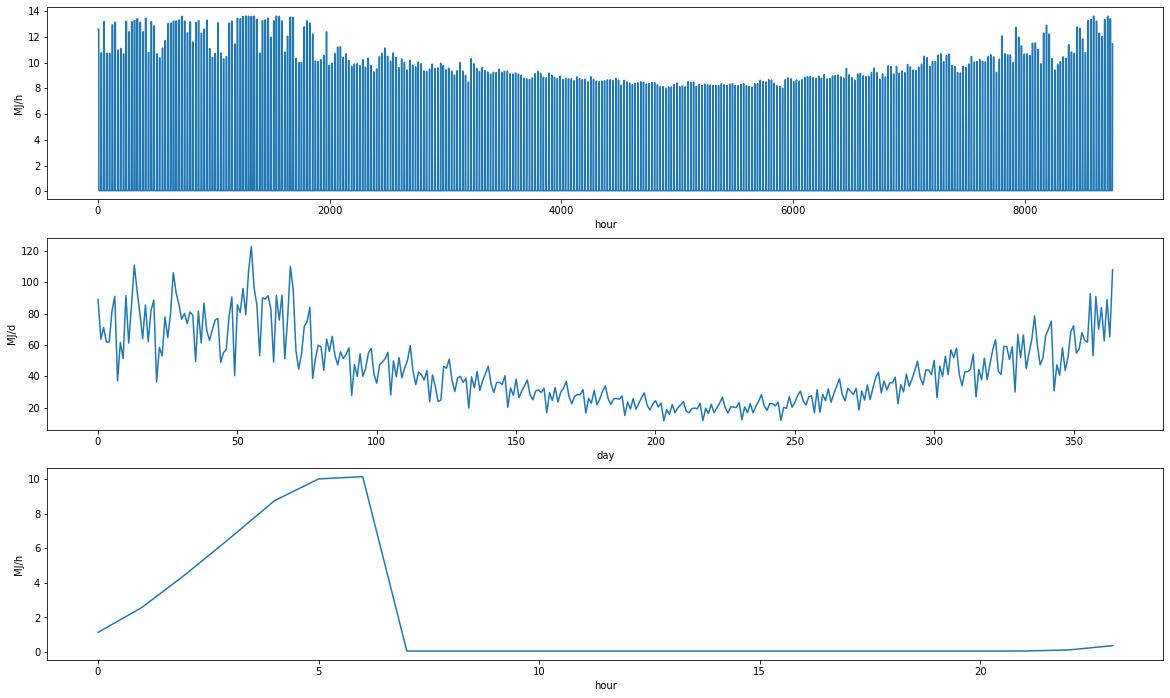

In [71]:
get_each_graph(testcase4)

### 計算条件5

- 電気ヒートポンプ・ガス瞬間式併用型給湯機（区分1）に変更  
※区分1：フロン系冷媒（タンク容量小）

In [72]:
base, HW = get_default_hot_water_demand()

HW['hw_type'] = '電気ヒートポンプ・ガス併用型給湯機(仕様による)'
HW['hybrid_category'] = '区分1'

testcase5 = calc_results(base, HW)['Ene_TOTAL']


給湯用一次エネルギー消費量 = 16298.021935129442MJ/年


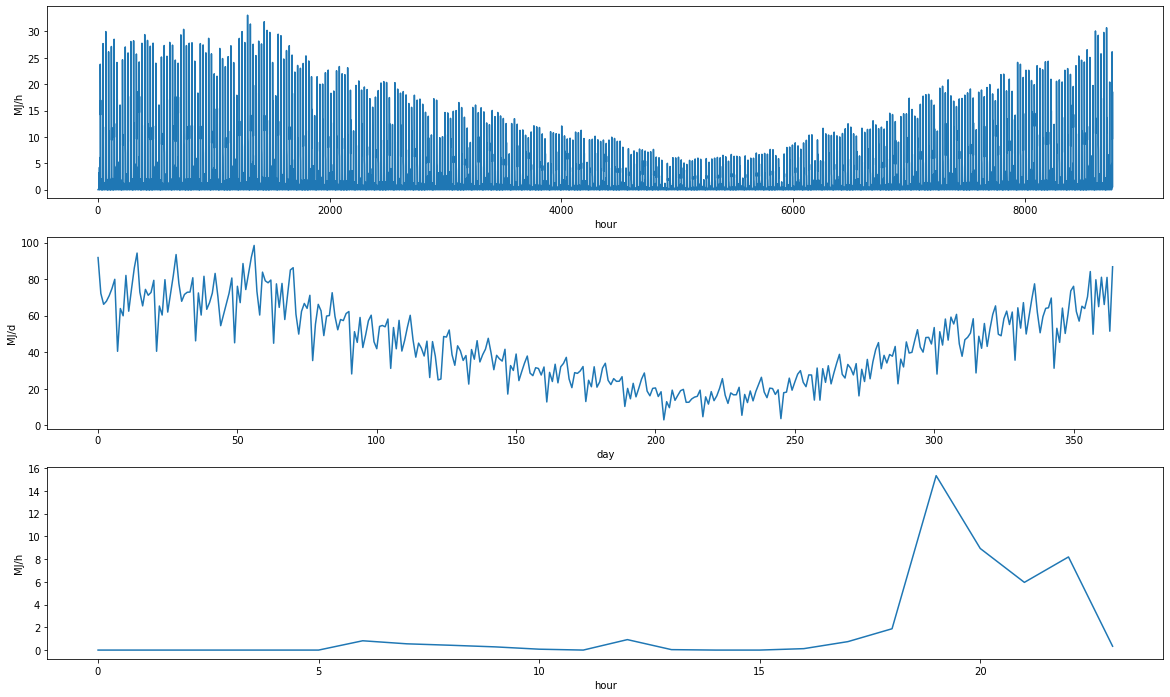

In [73]:
get_each_graph(testcase5)

### 計算条件6

- 節湯水栓あり
- ヘッダー分岐後のすべての配管径が13A以下
- 高断熱浴槽を使用する

In [74]:
base, HW = get_default_hot_water_demand()

HW['pipe_diameter'] = 'ヘッダーにより台所水栓・シャワー水栓・洗面水栓に分岐され、かつ分岐後の配管すべての径が13A以下であるもの'

HW['kitchen_watersaving_A'] = True
HW['kitchen_watersaving_C'] = True
HW['shower_watersaving_A'] = True
HW['shower_watersaving_B'] = True
HW['washbowl_watersaving_C'] = True
HW['bath_insulation'] = True

testcase6 = calc_results(base, HW)['Ene_TOTAL']


E_E_hs_aux1 = 33.82768429222222
E_E_hs_aux2 = 6.513888888888888
E_E_hs_aux3 = 11.213348844328705
給湯用一次エネルギー消費量 = 19272.396695178377MJ/年


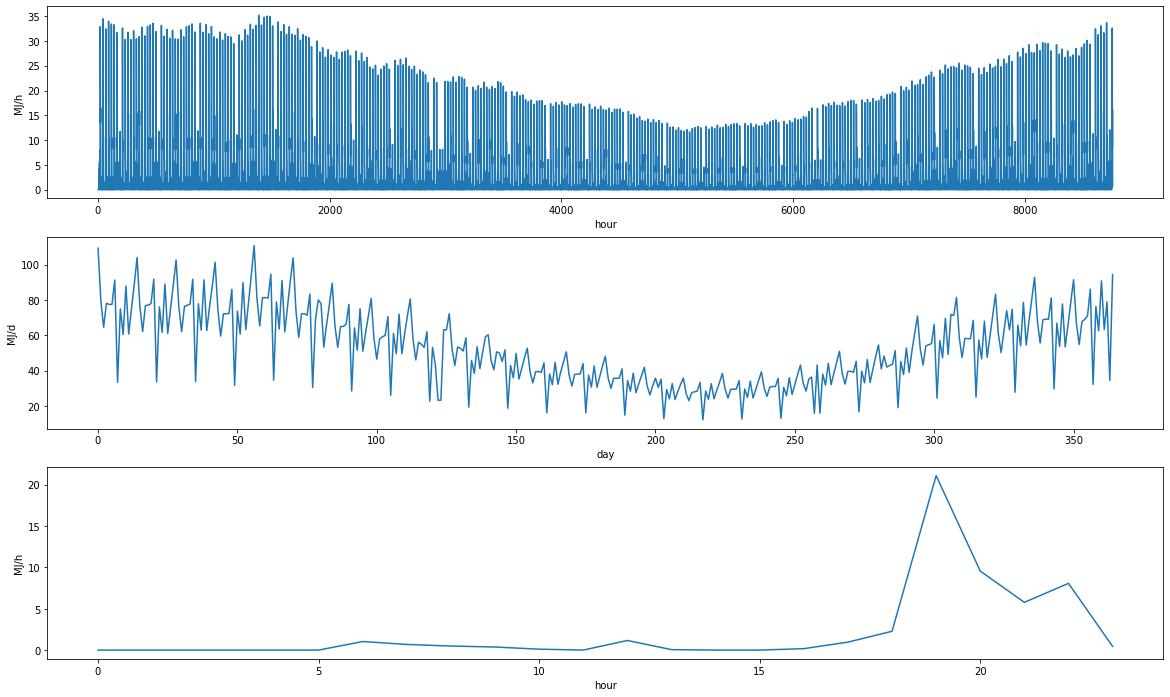

In [75]:
get_each_graph(testcase6)

## 比較

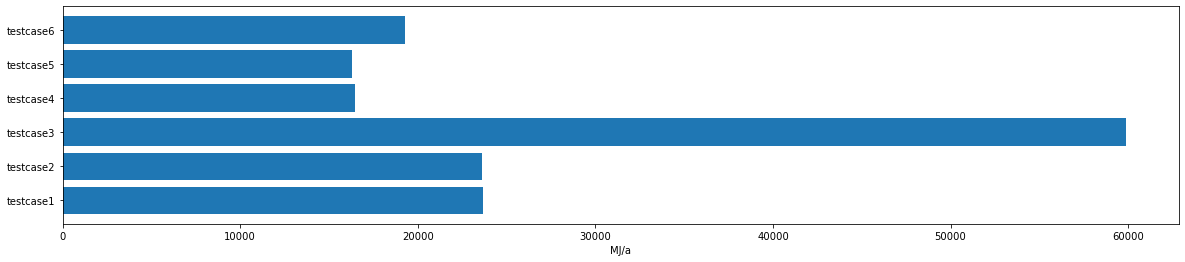

In [76]:
dat = {"testcase1":sum(testcase1),"testcase2" : sum(testcase2), "testcase3" : sum(testcase3), "testcase4" : sum(testcase4), 
       "testcase5" : sum(testcase5), "testcase6" : sum(testcase6)}
xx = list(dat.keys())
yy = list(dat.values())

fig = plt.figure(figsize=(20,4))
axt = fig.add_subplot(111)
axt.barh(xx,yy)
axt.set_xlabel("MJ/a")
plt.show()
